In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
import pandas as pd
import numpy as np
from IPython.display import display


# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ver todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# ver todas las filas
pd.set_option('display.max_rows', None)

In [4]:
# Cargamos el csv

df = pd.read_csv("ABC_data_sin_columnas_redundantes.csv")

Asegurar tipos de datos correctos antes de imputar nulos:

In [5]:
import pandas as pd
import numpy as np

def preparar_tipos_seguro(df, threshold_numerico=0.8):
    """
    🔧 Versión segura de 'preparar_tipos':
    - Limpia nombres de columnas.
    - Convierte columnas numéricas de verdad a float.
    - Convierte texto (object) a category.
    - Evita crear nuevos nulos.
    - threshold_numerico: porcentaje mínimo de valores numéricos reales
      necesario para convertir una columna a numérica.
    """

    # 1️⃣ Limpieza de nombres de columnas
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('-', '_')
    )

    # 2️⃣ Intentar conversión segura a numérico solo si la mayoría de los valores son números
    for col in df.select_dtypes(include='object').columns:
        # Contar valores que se pueden convertir a número
        serie = df[col].dropna().astype(str).str.replace(',', '.')
        numericos_validos = serie.str.replace('.', '', 1).str.isnumeric().mean()

        # Si más del threshold% son números, convertir
        if numericos_validos >= threshold_numerico:
            df[col] = pd.to_numeric(serie, errors='coerce')
            print(f"🔢 '{col}' convertido a numérico (float).")
        else:
            # Dejarlo como texto limpio
            df[col] = df[col].astype(str).str.strip()
            df[col] = df[col].replace(['nan', 'None', '', 'NaN'], pd.NA)
            df[col] = df[col].astype('category')
            print(f"🔤 '{col}' convertido a categoría (manteniendo nulos).")

    # 3️⃣ Asegurar que los numéricos sean float
    for col in df.select_dtypes(include=['int', 'float']).columns:
        df[col] = df[col].astype(float)

    # 4️⃣ Informe final
    print("\n✅ Conversión de tipos completada correctamente.")
    print(df.dtypes.value_counts())

    return df

In [6]:
df = preparar_tipos_seguro(df)

🔤 'attrition' convertido a categoría (manteniendo nulos).
🔤 'businesstravel' convertido a categoría (manteniendo nulos).
🔤 'department' convertido a categoría (manteniendo nulos).
🔤 'educationfield' convertido a categoría (manteniendo nulos).
🔤 'jobrole' convertido a categoría (manteniendo nulos).
🔤 'maritalstatus' convertido a categoría (manteniendo nulos).
🔤 'monthlyincome' convertido a categoría (manteniendo nulos).
🔤 'monthlyrate' convertido a categoría (manteniendo nulos).
🔤 'overtime' convertido a categoría (manteniendo nulos).
🔢 'performancerating' convertido a numérico (float).
🔤 'standardhours' convertido a categoría (manteniendo nulos).
🔢 'totalworkingyears' convertido a numérico (float).
🔢 'worklifebalance' convertido a numérico (float).
🔤 'salary' convertido a categoría (manteniendo nulos).
🔤 'roledepartament' convertido a categoría (manteniendo nulos).
🔤 'remotework' convertido a categoría (manteniendo nulos).

✅ Conversión de tipos completada correctamente.
float64     21

In [8]:
import pandas as pd

# Crear resumen de tipos y nulos
resumen_tipos_nulos = pd.DataFrame({
    'Tipo de dato': df.dtypes.astype(str),
    'Nulos (#)': df.isna().sum(),
    'Nulos (%)': (df.isna().sum() / len(df) * 100).round(2)
})

# Filtrar solo las columnas con nulos > 0
resumen_tipos_nulos = resumen_tipos_nulos[resumen_tipos_nulos['Nulos (#)'] > 0]

# Ordenar por porcentaje descendente
resumen_tipos_nulos = resumen_tipos_nulos.sort_values(by='Nulos (%)', ascending=False)

# Mostrar el resultado
if resumen_tipos_nulos.empty:
    print("No hay columnas con valores nulos.")
else:
    print("Columnas con nulos y su porcentaje:\n")
    display(resumen_tipos_nulos)

Columnas con nulos y su porcentaje:



,Tipo de dato,Nulos (#),Nulos (%)
department,category,1312,81.29
roledepartament,category,1312,81.29
businesstravel,category,772,47.83
educationfield,category,745,46.16
overtime,category,676,41.88
maritalstatus,category,651,40.33
totalworkingyears,float64,526,32.59
monthlyincome,category,468,29.00
standardhours,category,338,20.94
salary,category,274,16.98


Las ligeras variaciones en los porcentajes de nulos en comparación con el EDA, son debido a la eliminación de duplicados.

C:\Users\apdue\AppData\Local\Temp\ipykernel_22704\3521792253.py:51: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\apdue\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


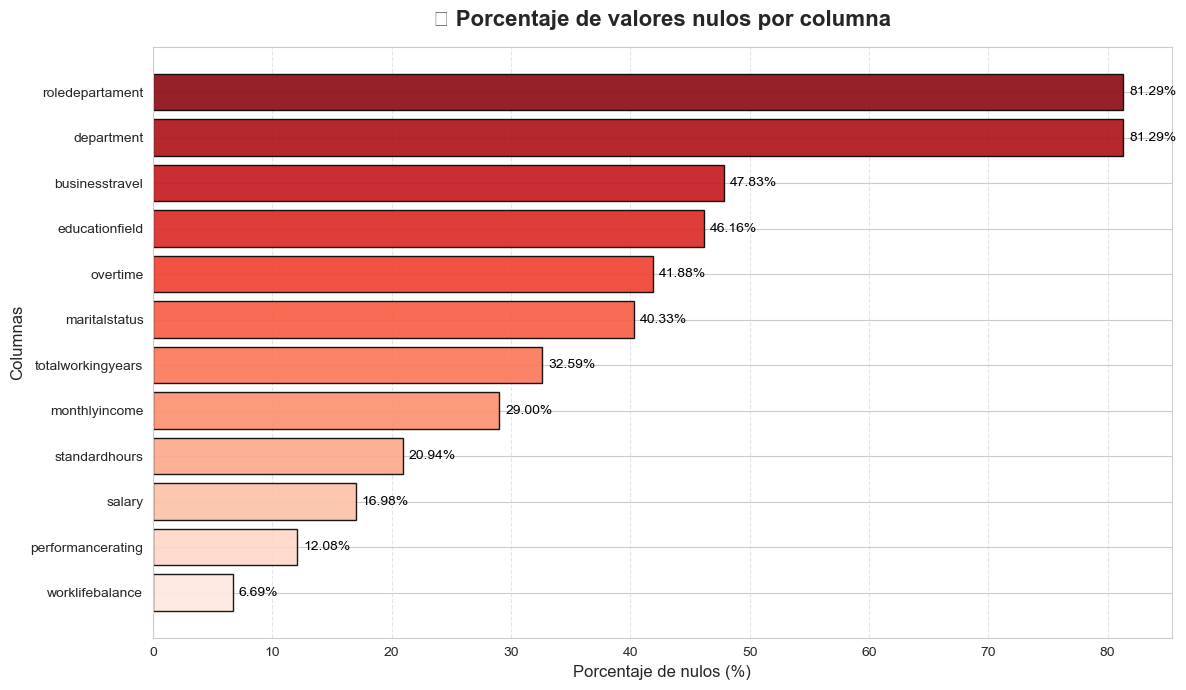

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ====================================================
# 1️⃣ Calcular porcentaje de nulos por columna
# ====================================================
nulos_df = pd.DataFrame({
    'Columna': df.columns,
    'Nulos (%)': (df.isna().sum() / len(df) * 100).round(2)
})

# Filtrar solo las columnas con nulos > 0
nulos_df = nulos_df[nulos_df['Nulos (%)'] > 0].sort_values(by='Nulos (%)', ascending=True)

# ====================================================
# 2️⃣ Gráfico de barras horizontales
# ====================================================
if nulos_df.empty:
    print("✅ No hay columnas con valores nulos.")
else:
    plt.figure(figsize=(12, 7))
    sns.set_style("whitegrid")

    # Crear paleta de colores rojos degradados
    colors = sns.color_palette("Reds", n_colors=len(nulos_df))

    # Gráfico de barras horizontales
    bars = plt.barh(
        y=nulos_df['Columna'],
        width=nulos_df['Nulos (%)'],
        color=colors,
        edgecolor='black',
        alpha=0.9
    )

    # Añadir porcentajes sobre las barras
    for bar, pct in zip(bars, nulos_df['Nulos (%)']):
        plt.text(
            bar.get_width() + 0.5,  # un poco a la derecha del final de la barra
            bar.get_y() + bar.get_height()/2,
            f"{pct:.2f}%",
            va='center', ha='left', fontsize=10, color='black'
        )

    # Estilo del gráfico
    plt.title('📉 Porcentaje de valores nulos por columna', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Porcentaje de nulos (%)', fontsize=12)
    plt.ylabel('Columnas', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


### IMPUTACIÓN DE NULOS

| Columna                                                                          | Tipo                      | % Nulos | Método      | Justificación                                         |
| -------------------------------------------------------------------------------- | ------------------------- | ------- | ----------- | ----------------------------------------------------- |
| `department`, `roledepartament`                                                  | categórica                | 81%     | `"Unknown"` | Alto nivel de nulos, se conserva info sin sesgo       |
| `businesstravel`, `educationfield`, `overtime`, `maritalstatus`, `standardhours` | categóricas               | 20–50%  | `"Unknown"` | No sesgan la distribución, evita eliminar filas       |
| `monthlyincome`, `salary`                                                        | categóricas (por formato) | 17–29%  | `"Unknown"` | Pérdida mínima de info, evita mal imputar números     |
| `totalworkingyears`                                                              | numérica                  | 32.6%   | Mediana     | Más robusta ante outliers                             |
| `performancerating`, `worklifebalance`                                           | numéricas discretas       | 12%, 6% | Moda (3)    | Valores ordinales, moda mantiene la tendencia central |


#### department y roledepartment los vamos a eliminar porque su porcentaje de nulos es excesivamente alto.

In [10]:
# Eliminación de columnas con exceso de nulos
# ====================================================

cols_drop = ['department', 'roledepartament']

for col in cols_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)
        print(f"🗑️ Columna '{col}' eliminada: porcentaje de nulos excesivamente alto.")
    else:
        print(f"⚠️ La columna '{col}' no existe en el DataFrame.")

print("\n✅ Columnas eliminadas correctamente (department y roledepartament).")

# Mostrar columnas restantes para verificar
print("\n📋 Columnas actuales del DataFrame:")
print(df.columns.tolist())

🗑️ Columna 'department' eliminada: porcentaje de nulos excesivamente alto.
🗑️ Columna 'roledepartament' eliminada: porcentaje de nulos excesivamente alto.

✅ Columnas eliminadas correctamente (department y roledepartament).

📋 Columnas actuales del DataFrame:
['attrition', 'businesstravel', 'dailyrate', 'distancefromhome', 'education', 'educationfield', 'employeenumber', 'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager', 'datebirth', 'salary', 'remotework']


Imputación de nulos en variables categóricas y numéricas

In [11]:

# ====================================================
# 1️VARIABLES CATEGÓRICAS — IMPUTACIÓN CON 'Unknown'
# ====================================================

cols_unknown = [
    'businesstravel',
    'educationfield',
    'overtime',
    'maritalstatus',
    'standardhours',
    'monthlyincome',   
    'salary'           
]

for col in cols_unknown:
    if col in df.columns:
        # Si la columna es categórica, agregamos 'Unknown' como categoría válida
        if pd.api.types.is_categorical_dtype(df[col]):
            if 'Unknown' not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories(['Unknown'])
        # Rellenar los nulos
        df[col] = df[col].fillna('Unknown')
        print(f"✅ '{col}' imputada con 'Unknown'")

# ====================================================
# 2️⃣ VARIABLES NUMÉRICAS — SEGÚN NATURALEZA Y DISTRIBUCIÓN
# ====================================================

# totalworkingyears → imputar con mediana (distribución asimétrica)
if 'totalworkingyears' in df.columns:
    mediana_twy = df['totalworkingyears'].median()
    df['totalworkingyears'] = df['totalworkingyears'].fillna(mediana_twy)
    print(f"✅ 'totalworkingyears' imputada con mediana ({mediana_twy})")

# performancerating → imputar con moda (valor más común = 3)
if 'performancerating' in df.columns:
    moda_perf = df['performancerating'].mode()[0]
    df['performancerating'] = df['performancerating'].fillna(moda_perf)
    print(f"✅ 'performancerating' imputada con moda ({moda_perf})")

# worklifebalance → imputar con moda (valor más común = 3)
if 'worklifebalance' in df.columns:
    moda_wlb = df['worklifebalance'].mode()[0]
    df['worklifebalance'] = df['worklifebalance'].fillna(moda_wlb)
    print(f"✅ 'worklifebalance' imputada con moda ({moda_wlb})")

# ====================================================
# 3️⃣ VERIFICACIÓN FINAL
# ====================================================
nulos_restantes = df.isna().sum()
nulos_restantes = nulos_restantes[nulos_restantes > 0]

if len(nulos_restantes) == 0:
    print("\n🎉 No quedan nulos en el dataset.")
else:
    print("\n⚠️ Aún hay columnas con nulos:")
    print(nulos_restantes)

✅ 'businesstravel' imputada con 'Unknown'
✅ 'educationfield' imputada con 'Unknown'
✅ 'overtime' imputada con 'Unknown'
✅ 'maritalstatus' imputada con 'Unknown'
✅ 'standardhours' imputada con 'Unknown'
✅ 'monthlyincome' imputada con 'Unknown'
✅ 'salary' imputada con 'Unknown'
✅ 'totalworkingyears' imputada con mediana (10.0)
✅ 'performancerating' imputada con moda (3.0)
✅ 'worklifebalance' imputada con moda (3.0)

🎉 No quedan nulos en el dataset.


C:\Users\apdue\AppData\Local\Temp\ipykernel_22704\3472648260.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


In [13]:

# ====================================================
# 1️Comprobación general
# ====================================================
total_nulos = df.isna().sum().sum()

if total_nulos == 0:
    print("No quedan valores nulos en el dataset.")
else:
    print(f"Quedan {total_nulos} valores nulos en total.\n")

    # ====================================================
    # Detalle por columna (solo las que tienen nulos)
    # ====================================================
    nulos_df = pd.DataFrame({
        "Columna": df.columns,
        "Nulos": df.isna().sum(),
        "Porcentaje (%)": (df.isna().sum() / len(df) * 100).round(2),
        "Tipo de dato": df.dtypes.astype(str)
    })

    nulos_df = nulos_df[nulos_df["Nulos"] > 0].sort_values(by="Porcentaje (%)", ascending=False)

    display(nulos_df)

No quedan valores nulos en el dataset.


Guardamos el dataset sin nulos como csv:

In [14]:
df.to_csv("ABC_data_sin_nulos.csv", index=False, encoding='utf-8')